In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [8]:
# Check for missing values
df['host_nr_listings'].isna().sum()

1

In [9]:
# Drop entry with missing value
df.dropna(subset=['host_nr_listings'], inplace=True)

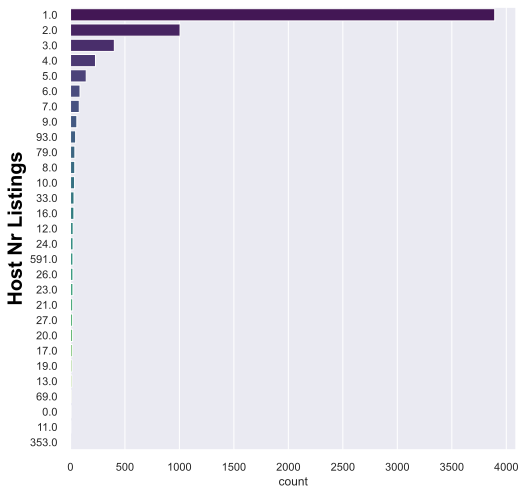

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'host_nr_listings',data = df,order = df['host_nr_listings'].value_counts().index,palette = "viridis")
plt.ylabel('Host Nr Listings',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

In [11]:
corr = df['host_nr_listings'].corr(df['target'])
print(corr)

-0.006457064614165034


In [12]:
# Remove all entries with listings = 0 (does not make sense)
df = df[df['host_nr_listings'] != 0]

In [13]:
# Remove listings outliers
Q1_list = df['host_nr_listings'].quantile(0.25)
Q3_list = df['host_nr_listings'].quantile(0.75)
IQR_list = Q3_list - Q1_list

lower_bound_list = Q1_list - 1.5 * IQR_list
upper_bound_list = Q3_list + 1.5 * IQR_list

df = df[(df['host_nr_listings'] >= lower_bound_list) & (df['host_nr_listings'] <= upper_bound_list)]

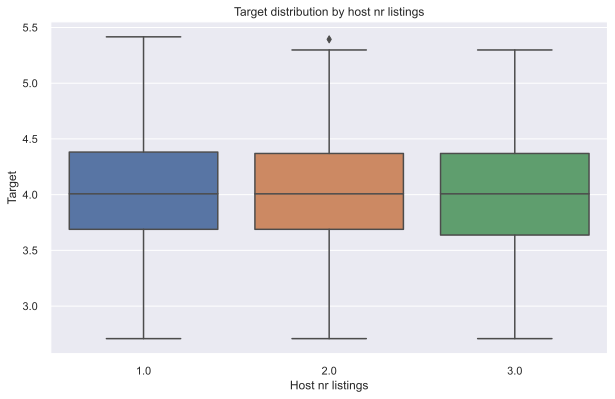

In [14]:
# Generate the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='host_nr_listings', y='target', data=df)
ax.set_title('Target distribution by host nr listings')
ax.set_xlabel('Host nr listings')
ax.set_ylabel('Target')
plt.show()

In [15]:
# Generate the statistical description
df.groupby('host_nr_listings')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
host_nr_listings,,,,,,,,
1.0,3894.0,4.024998,0.521561,2.70805,3.688879,4.007333,4.382027,5.416100
2.0,1006.0,4.020720,0.494625,2.70805,3.688879,4.007333,4.369448,5.393628
3.0,403.0,3.999563,0.533366,2.70805,3.637586,4.007333,4.369448,5.298317


In [16]:
corr_filtered = df['host_nr_listings'].corr(df['target'])
print(corr_filtered)

-0.011773263735421794


In [17]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['host_nr_listings'], df['target'])
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}")

Pearson correlation coefficient: -0.012
p-value: 0.391


In [18]:
import scipy.stats as stats

# get the unique values of host_response_time
response_times = df['host_nr_listings'].dropna().unique()

# create a list of data frames containing the prices for each response time category
price_by_response_time = [df.loc[df['host_nr_listings'] == rt, 'target'] for rt in response_times]

# perform ANOVA test
f_value, p_value = stats.f_oneway(*price_by_response_time)

print("F-value: ", f_value)
print("P-value: ", p_value)

F-value:  0.44661151494386503
P-value:  0.6398164856849232


In [19]:
# Because of the reasons highlighted in this EDA, we have decided to remove host_nr_listings
# as an attribute from our training set.